# 1. Meanshift algorithm
![](http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/)  

<img src='rc/meanshift.png' alt='meanshift' width="640" height="480">

① 각 datapoint x에 대하여, bandwidth 내에 있는 이웃 point들을 탐색  
  
  - 주로 가우시안 커널을 사용 (가까운 datapoint가 멀리 있는 datapoint보다 더 큰 영향을 미침)
$$ 
Gaussian = \frac{1}{\sigma \sqrt{2 \pi}} e^{-{1 \over 2}}{\big( \frac{x-\mu}{\sigma} \big)}^2
$$

<br>

② 다음 수식을 이용하여 meanshift $m(x)$를 계산함
$$
m(x_t)= \frac{\sum_{i} K(x_i - x) \, x_i}{\sum_i K(x_i - x)}
$$

  - $K(x_i - x)$를 $w_i$로 치환하면,  

$$
\bar{x} = \frac{\sum_{i} w_i x_i}{\sum_i w_i}
$$

  - 즉, meanshift는 중심점 x에 영향을 주는 datapoint들의 **weighted average(가중치 평균)**으로 계산됨  
  
<br>

③ 각 datapoint x에 대하여, 새로운 $\bar{x}$로 업데이트 함  
$$
x_{t+1} = x_t + m(x_t)
$$

<br>

④ <u>1) 설정한 반복 횟수를 채우거나</u>, <u>2) 중심점이 더 이상 거의 움직이지 않을 때</u>까지 ① ~ ④를 반복  

### [reference]
- [link #1 - meanshift and object tracking](https://darkpgmr.tistory.com/64?category=460965)

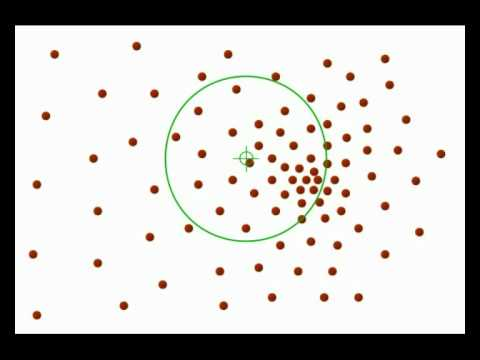

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('kmaQAsotT9s')

# 2. Basic code
## 1) Sample data

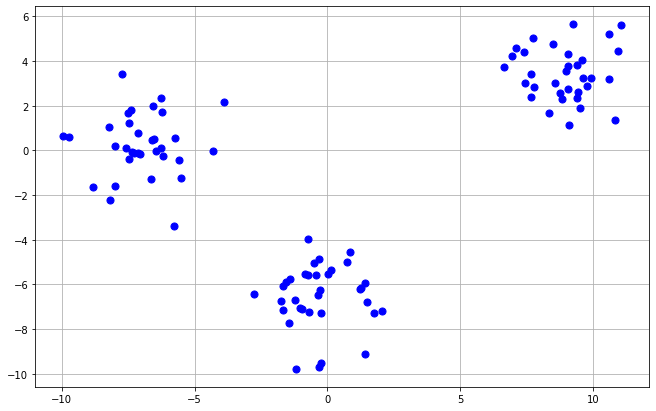

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 샘플 데이터 1
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11],
              [8, 2],
              [10, 2],
              [9, 3]])

## 샘플 데이터 2
X = np.array([[ 9.41309256e+00,  3.80126631e+00],
              [-9.72251477e+00,  6.01161199e-01],
              [ 1.28294440e+00, -6.13705649e+00],
              [-7.36210444e+00, -7.46120098e-02],
              [-9.53978128e-01, -7.08256146e+00],
              [ 9.08493312e+00,  1.12415408e+00],
              [-6.24180450e+00,  1.73487169e+00],
              [ 9.64751418e+00,  3.23661748e+00],
              [-2.49872427e-01, -7.26371360e+00],
              [ 9.60337561e+00,  4.05083377e+00],
              [ 7.68921558e+00,  2.37456066e+00],
              [ 1.10601118e+01,  5.61542998e+00],
              [ 9.07529629e+00,  4.33220215e+00],
              [-6.25343429e+00,  2.34014121e+00],
              [-7.45325139e+00, -4.00431927e-01],
              [ 1.09320552e+01,  4.45298162e+00],
              [ 8.45384120e-01, -4.56183361e+00],
              [-2.77839499e-01, -6.23554691e+00],
              [ 1.06025886e+01,  5.21518542e+00],
              [ 8.97599410e+00,  3.54981980e+00],
              [ 9.51249732e+00,  1.89380503e+00],
              [ 9.24504941e+00,  5.66818056e+00],
              [-2.54635001e-01, -9.49681222e+00],
              [ 8.55856670e+00,  3.03174308e+00],
              [-6.57840350e+00,  2.00198112e+00],
              [-1.39001965e+00, -5.75601009e+00],
              [ 9.93093341e+00,  3.24261512e+00],
              [ 7.09170043e+00,  4.59778040e+00],
              [ 9.07823593e+00,  3.76857855e+00],
              [-1.03670704e+00, -7.04702517e+00],
              [-8.83140502e+00, -1.62297239e+00],
              [-5.75105929e+00,  5.43795708e-01],
              [-8.17580079e+00, -2.21380813e+00],
              [-7.74259936e+00,  3.42862577e+00],
              [-1.18441916e+00, -9.79600471e+00], 
              [-6.59620414e+00,  4.60836614e-01],
              [ 1.43947496e+00, -9.10417644e+00],
              [ 7.33747743e-01, -4.98783826e+00],
              [-3.88957413e+00,  2.18638948e+00],
              [ 8.35712674e+00,  1.67297782e+00],
              [-7.27449177e+00, -1.22906685e-01],
              [-1.54210637e+00, -5.90122360e+00],
              [-8.33190440e-01, -5.53698826e+00],
              [-7.31213387e-01, -3.98180232e+00],
              [-5.16878500e-01, -5.04328039e+00],
              [-3.17901677e-01, -9.69168082e+00],
              [-1.43106154e+00, -7.73903528e+00],
              [-2.75851072e+00, -6.42686140e+00],
              [ 1.24942235e+00, -6.21471577e+00],
              [ 7.76760731e+00,  2.83809619e+00],
              [-7.14689608e+00, -1.32839469e-01],
              [-7.56738437e+00,  9.32614082e-02],
              [-5.56853520e+00, -4.17869905e-01],
              [-7.39958712e+00,  1.82936757e+00],
              [-7.20683486e-01, -5.56204122e+00],
              [ 8.84459272e+00,  2.30604507e+00],
              [-6.18418520e+00, -2.47904360e-01],
              [-5.76545756e+00, -3.40143104e+00],
              [ 9.45623662e+00,  2.59433227e+00],
              [ 1.43366627e+00, -5.94458017e+00],
              [ 1.64568653e-02, -5.52894081e+00],
              [ 7.76553674e+00,  5.03763845e+00],
              [ 1.74771948e+00, -7.25921982e+00],
              [ 7.45347260e+00,  3.00798374e+00],
              [-9.94310686e+00,  6.49300937e-01],
              [-6.54214971e+00,  4.93562299e-01],
              [ 9.78392282e+00,  2.86524719e+00],
              [-1.21329752e+00, -6.70851618e+00],
              [-1.74762115e+00, -6.75476968e+00],
              [-4.29262955e+00, -1.45348354e-02],
              [ 7.67048231e+00,  3.44131219e+00],
              [-3.51747196e-01, -6.46297393e+00],
              [-7.50524418e+00,  1.67657157e+00],
              [ 9.06386095e+00,  2.75047286e+00],
              [-7.98292742e+00,  2.17432965e-01],
              [ 6.95680322e+00,  4.22519308e+00],
              [-4.10382836e-01, -5.56556013e+00],
              [-7.13367640e+00,  7.66574094e-01],
              [-6.45828016e+00, -6.43032887e-03],
              [ 8.76491560e+00,  2.56871402e+00],
              [ 7.42738648e+00,  4.40369390e+00],
              [-1.66560772e+00, -6.05497326e+00],
              [ 6.64262299e+00,  3.71237541e+00],
              [ 1.45265876e-01, -5.35044353e+00],
              [-7.06080554e+00, -1.53513406e-01],
              [-5.49955532e+00, -1.21579504e+00],
              [ 1.08265066e+01,  1.37944768e+00],
              [ 8.48588654e+00,  4.76975931e+00],
              [-1.65960546e+00, -7.15711556e+00],
              [-6.63193265e+00, -1.27492914e+00],
              [ 1.05963520e+01,  3.18067923e+00],
              [-3.02235898e-01, -4.84042949e+00],
              [-7.98679354e+00, -1.57311103e+00],
              [-6.70477540e-01, -7.21958439e+00],
              [ 9.40053270e+00,  2.36020591e+00],
              [-8.20727095e+00,  1.03064246e+00],
              [ 1.50043798e+00, -6.77548889e+00],
              [-7.48401892e+00,  1.24652547e+00],
              [-6.26635360e+00,  1.05071186e-01],
              [ 2.05521077e+00, -7.16728506e+00]])

plt.figure(figsize=(11,7))
plt.scatter(X[:,0], X[:,1], color='b', s=50, zorder=2)
plt.grid()
plt.show()

## 2) Meanshift

In [3]:
import numpy as np

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a-b)**2))

def gaussian_kernel(distance, sigma):
    return (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*((distance / sigma))**2)

def meanshift(data, bandwidth=4, n_iterations=50, epsilon=0.01):   
    history = []
    history.append(data)
    
    ## 초기값 설정
    prev_centroids = data.copy()
    centroids = data.copy()

    ## 종료 조건 1 - 최대 n_iterations 만큼 반복
    for i in range(n_iterations):      
        print('Iteration %d' %i)
        
        for k, centroid in enumerate(centroids):
            ## 현재 중심점과의 거리가 bandwidth 내에 있는 datapoint들을 별도의 리스트에 저장
            in_bandwidth = []
            for point in data:
                if euclidean_distance(point, centroid) <= bandwidth:
                    in_bandwidth.append(point)

            ## bandwidth 내에 있는 데이터들을 기반으로 새로운 중심점 계산
            numerator = 0    # 분자
            denominator = 0  # 분모
            for inPoint in in_bandwidth:
                distance = euclidean_distance(inPoint, centroid)
                weight = gaussian_kernel(distance, bandwidth)
                numerator += (weight*inPoint)
                denominator += weight
            new_centroid = numerator / denominator
            
            ## 중심점 업데이트
            centroids[k] = new_centroid
        
        history.append(np.copy(centroids))  # iteration마다 군집 중심 정보 저장
        
        ## 종료 조건 2 - 새로운 중심점과 이전 중심점과의 차이가 epsilon보다 크지 않으면 stop!
        if all(euclidean_distance(new, prev) < epsilon for new, prev in zip(centroids, prev_centroids)):
            break
        
        prev_centroids = centroids.copy()
    
    ## 소수점 첫 번째 자리까지 일치하면 
    unique_centroids = np.unique(np.round(centroids, 1), axis=0)
    
    return unique_centroids, history

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
[[-7.1  0.2]
 [-0.3 -6.1]
 [ 8.9  3.3]]


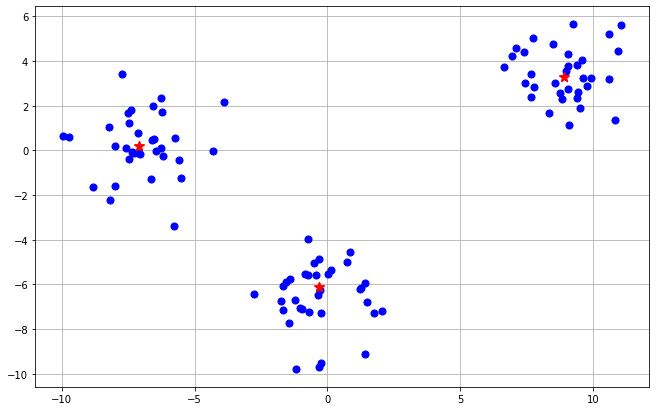

In [4]:
## meanshift 수행
centroids, history = meanshift(X, bandwidth=3)
print(centroids)

## 결과 그리기
plt.figure(figsize=(11,7))
plt.scatter(X[:,0], X[:,1], color='b', s=50, zorder=2)
for c in centroids:
    plt.scatter(centroids[:,0], centroids[:,1], color='r', marker='*',  s=100, zorder=2)
plt.grid()
plt.show()

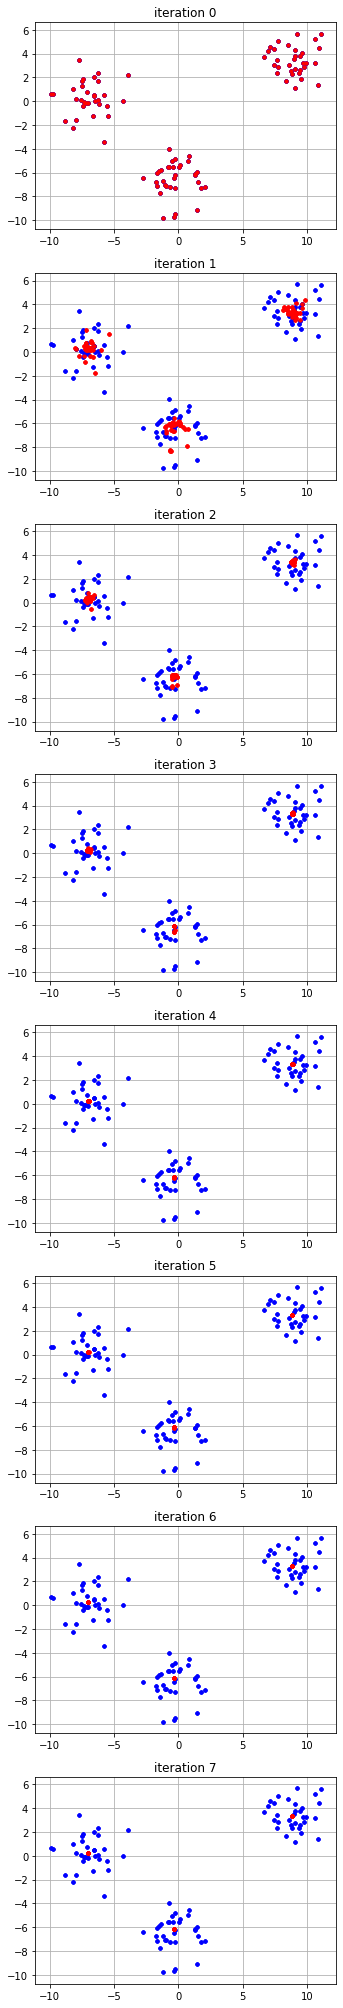

In [5]:
## 결과 그리기
plt.figure(figsize=(5,28))

n = len(history)
for i in range(n):
    plt.subplot(n,1,i+1)
    for c in centroids:
        plt.scatter(X[:,0], X[:,1], color='b', marker='o',  s=10, zorder=2)
        plt.scatter(history[i][:,0], history[i][:,1], color='r', marker='o',  s=10, zorder=2)
    plt.title('iteration %d'%i)
    plt.grid()
    
plt.tight_layout()
plt.show()

# 3. Applications
## 1) object tracking
[](https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_mean_shift_tracking_segmentation.php)
[](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_meanshift/py_meanshift.html)

In [6]:
import numpy as np
import cv2

## 1) 첫 frame에서 초기 window 설정
cap = cv2.VideoCapture('slow_traffic_small.mp4')
ret,frame = cap.read()

x,y,w,h = 310,188,41,41
track_window = (x,y,w,h)
roi = frame[y:y+h, x:x+w]

## 2) histogram backprojection을 위한 모델 히스토그램 계산
hsv_m =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_m, np.array([0,60,32]), np.array([180,255,255]))
hist_m = cv2.calcHist([hsv_m],[0], mask, [180], [0,180])
hist_m = (hist_m - hist_m.min()) / (hist_m.max() - hist_m.min())


## 3) meanshift 종료 조건 설정 (10번 반복하거나 중심 이동량이 1보다 작은 경우)
term_crit = (cv2.TERM_CRITERIA_COUNT | cv2.TERM_CRITERIA_EPS, 10, 1)

# 매 프레임마다 반복
while True:    
    ret ,frame = cap.read() # 비디오로부터 현재 프레임을 읽어옴
    if ret == False:
        break
        
    ## 4) histogram backprojection을 통해 원하는 영역만 남김
    ## https://docs.opencv.org/2.4/modules/imgproc/doc/histograms.html#calcbackproject
    hsv_i = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    dst = cv2.calcBackProject(images = [hsv_i],                # 입력 영상 리스트
                              channels = [0],                  # histogram backproject하고자 하는 영상 채널
                              hist = hist_m,                   # 기준이 되는 모델 히스토그램
                              ranges = [0,180],                # 히스토그램 bin의 범위
                              scale = 1)                       # 출력값의 스케일
    
    ## 5) backprojection 결과를 입력으로 meanshift 수행
    ## https://docs.opencv.org/2.4/modules/video/doc/motion_analysis_and_object_tracking.html#meanshift
    ret, track_window = cv2.meanShift(probImage = dst,         # 물체 히스토그램의 backprojection 결과
                                      window = track_window,   # 초기 윈도우
                                      criteria = term_crit)    # 탐색 알고리즘의 반복을 멈추기 위한 기준

    
    ## 6) 결과 그리기
    x,y,w,h = track_window
    img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255, 2)
    cv2.imshow('tracking',img2)

    k = cv2.waitKey(0) & 0xff
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

## 2) Image segmentation (posterization)

In [7]:
import cv2

img = cv2.imread('villa.jpg')
luv = cv2.cvtColor(img, cv2.COLOR_BGR2Luv)

## meanshift segmentation
## https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#pyrmeanshiftfiltering
shifted = cv2.pyrMeanShiftFiltering(src = luv,  # 8-bit, 3-channel 이미지
                                    sp = 11,    # 공간 윈도우 반지름
                                    sr = 31)    # 컬러 윈도우 반지름

shifted = cv2.cvtColor(shifted, cv2.COLOR_Luv2BGR)
cv2.imshow('original', img)
cv2.imshow('shifted', shifted)

cv2.waitKey()
cv2.destroyAllWindows()

## ※ Image segmentation (watershed)
![](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html)
![](https://opencv-python.readthedocs.io/en/latest/doc/27.imageWaterShed/imageWaterShed.html)
![](https://webnautes.tistory.com/1281)
<img src='rc/watershed.png' alt='watershed' width="400" heigh="280">

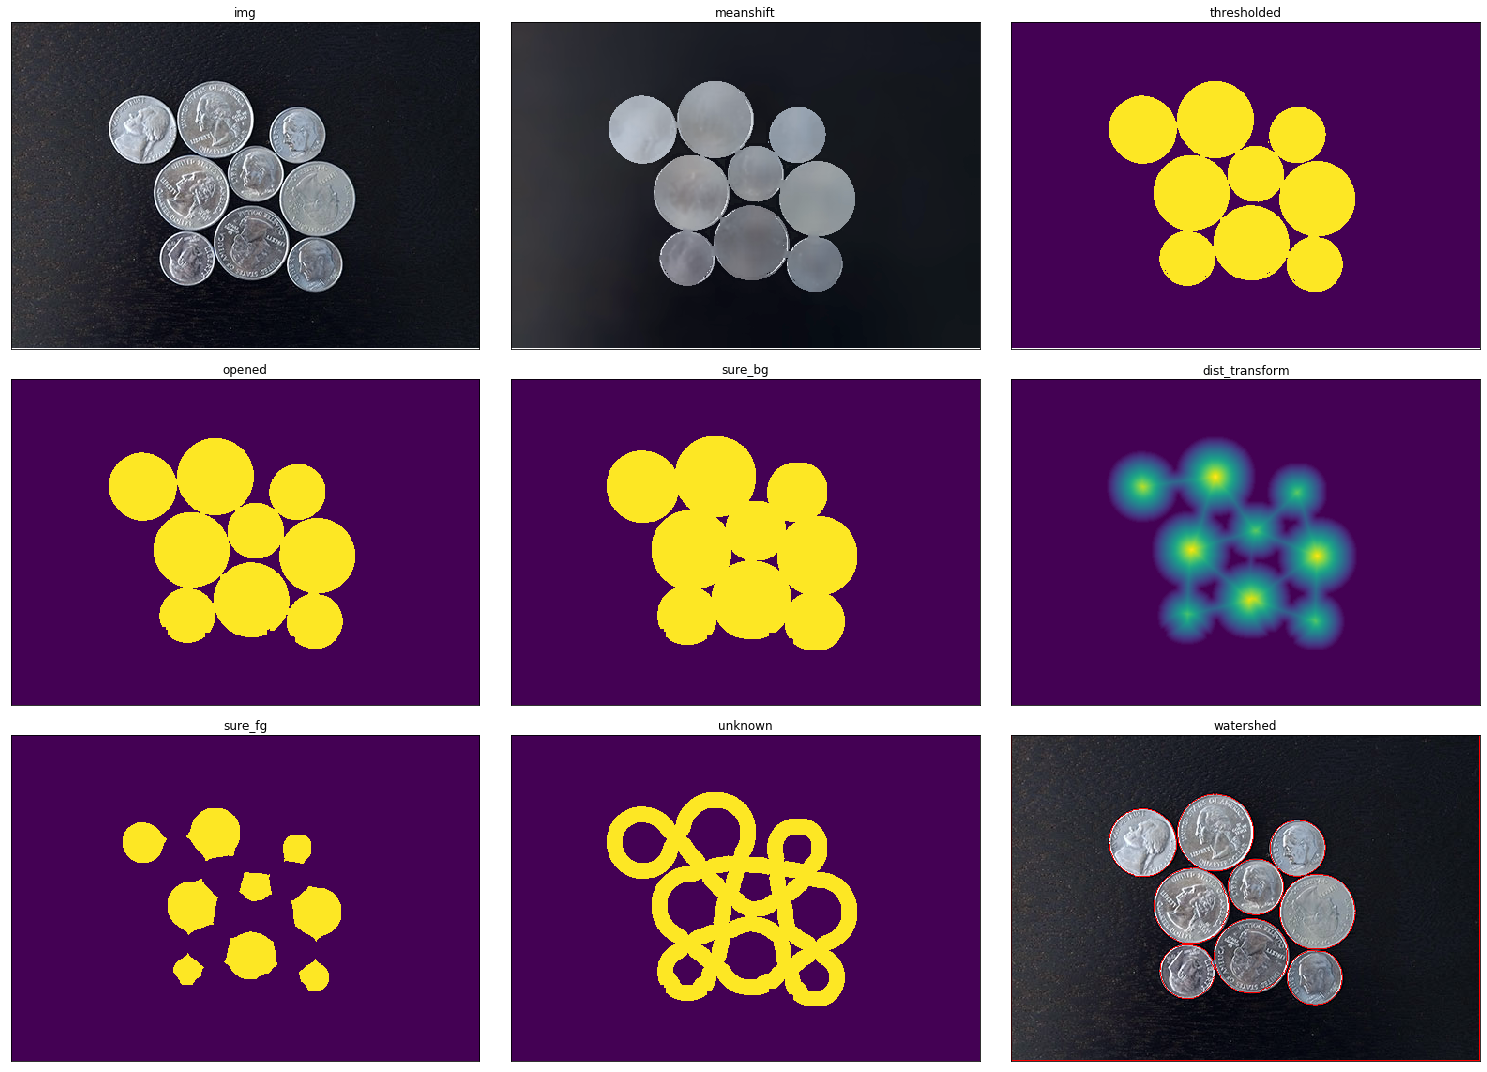

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('coins.jpg')

## 1) RGB -> LUV 색공간 변환
luv = cv2.cvtColor(img, cv2.COLOR_BGR2Luv)


## 2) meanshift segmentation
## https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#pyrmeanshiftfiltering
shifted = cv2.pyrMeanShiftFiltering(src =luv,  # 8-bit, 3-channel 이미지
                                    sp = 11,   # 공간 윈도우 반지름
                                    sr = 51)   # 컬러 윈도우 반지름


## 3) Otsu 이진화를 통한 foreground 영역 검출
## https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#threshold
shifted = cv2.cvtColor(shifted, cv2.COLOR_Luv2BGR)
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
_, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)


## 4) 모폴로지 연산을 사용하여 foreground 영역 노이즈 영역 제거 + foreground 영역 확장
## https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#morphologyex
kernel = np.ones((3,3), np.uint8)
opened = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opened, kernel,iterations=2)


## 5) 거리 변환 + 이진화를 사용하여 확실한 foreground 영역 검출
## https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#distancetransform
dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.4*dist_transform.max(), 255, cv2.THRESH_BINARY)
sure_fg = np.uint8(sure_fg)

## 6) foreground인지 background인지 모호한 영역 설정 => unknown
unknown = cv2.subtract(sure_bg, sure_fg)

## 7) 확실한 foreground 영역 labeling 및 marker 설정
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1                  # marker는 watershed에서 seed로 사용됨
markers[unknown == 255] = 0            # marker에 unknown 영역 설정

## 8) watershed 알고리즘 수행 
## https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#watershed
labels = cv2.watershed(img, markers)   ## 워터셰드 결과 label
                                       # -1: foreground 외곽선
                                       # 1~: 영역별 labeling

                
## 9) 결과 그리기
result = img.copy()
result[labels == -1] = (255,0,0)  # 외곽선

images = [img, shifted, thresholded,  opened, sure_bg, dist_transform, sure_fg, unknown, result]
titles = ['img','meanshift','thresholded','opened','sure_bg','dist_transform','sure_fg','unknown','watershed']

plt.figure(figsize=(21,15))
for i in range(len(images)):
    plt.subplot(3,3,i+1),
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.savefig('result.png')
plt.show()